## Data Visualization on Exchange Rates

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as ydates
from datetime import datetime

%matplotlib inline

In [56]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [57]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [58]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [59]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [60]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


#### With focus on Euro to Dollar

In [61]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [62]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [63]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.1633     1
1.5869     1
1.2775     1
1.1725     1
0.9322     1
Name: US_dollar, Length: 3528, dtype: int64

In [64]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']
                                != '-']

In [65]:
euro_to_dollar['US_dollar'] = euro_to_dollar[
    'US_dollar'].astype(float)

In [66]:
euro_to_dollar.tail()

,Time,US_dollar
5694,2021-01-04,1.2296
5695,2021-01-05,1.2271
5696,2021-01-06,1.2338
5697,2021-01-07,1.2276
5698,2021-01-08,1.2250


In [67]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


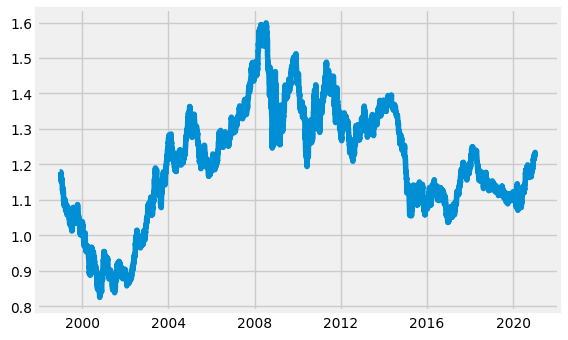

In [68]:
#evolution of the euro-dollar exchange rate

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

#### Rolling Mean

In [69]:
# 30 days rolling mean for the US dollar

euro_to_dollar['rolling_mean'] = euro_to_dollar[
    'US_dollar'].rolling(30).mean()

In [70]:
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357
5698,2021-01-08,1.2250,1.216557


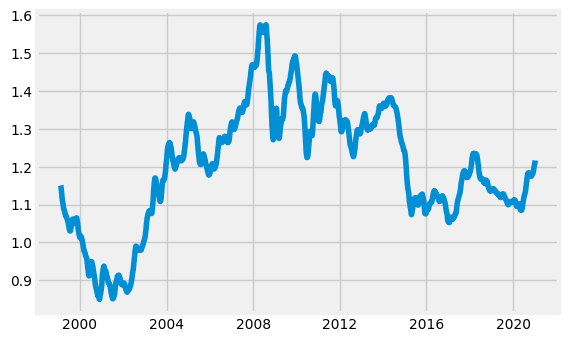

In [71]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

In [72]:
euro_to_dollar['Year'] = euro_to_dollar[
    'Time'].dt.strftime('%Y')

In [73]:
euro_to_dollar['Year'] = euro_to_dollar['Year'].astype(int)

In [74]:
euro_to_dollar.head()

,Time,US_dollar,rolling_mean,Year
0,1999-01-04,1.1789,NaN,1999
1,1999-01-05,1.1790,NaN,1999
2,1999-01-06,1.1743,NaN,1999
3,1999-01-07,1.1632,NaN,1999
4,1999-01-08,1.1659,NaN,1999


In [75]:
twentysix_ten = euro_to_dollar[(euro_to_dollar['Year']
                                  >= 2006) & (
    euro_to_dollar['Year'] <= 2010) ]

In [76]:
twentyseven_eight = euro_to_dollar[(euro_to_dollar['Year']
                                  >= 2007) & (
    euro_to_dollar['Year'] <= 2008) ]

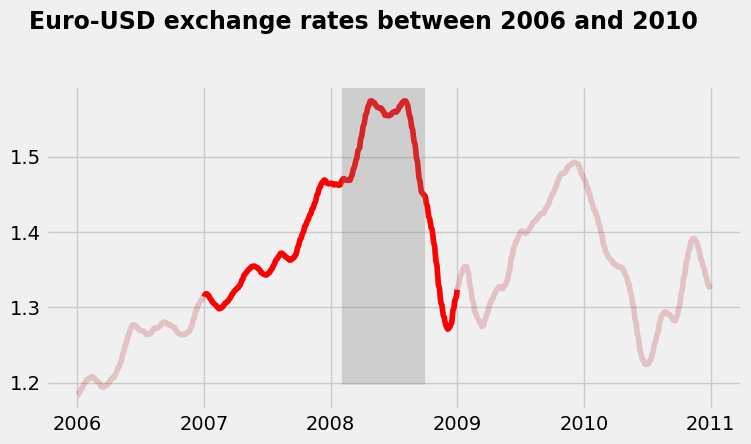

In [77]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(twentysix_ten['Time'],
         twentysix_ten['rolling_mean'],
        color='#af0b1e', alpha=0.2)
ax.plot(twentyseven_eight['Time'],
         twentyseven_eight['rolling_mean'], color = 'red')
ax.text(732172.0, 1.67,
         'Euro-USD exchange rates between 2006 and 2010',
        size=17, weight = 'bold')

ax.axvline(pd.Timestamp('2008-06-01'), color='grey', 
           linewidth=60, alpha=0.3, ymin = 0.08)

plt.show()

#### Euro-USD rate under the last three US presidents

In [78]:
# George W. Bush (2001 - 2009)

bush = euro_to_dollar[(euro_to_dollar['Year'] >= 2001)
                  & (euro_to_dollar['Year'] <= 2008)]

# Barack Obama (2009 - 2017)

obama = euro_to_dollar[(euro_to_dollar['Year'] >= 2009)
                  & (euro_to_dollar['Year'] <= 2016)]

# Donald Trump (2017 - 2021)

trump = euro_to_dollar[(euro_to_dollar['Year'] >= 2017)
                  & (euro_to_dollar['Year'] <= 2020)]

In [79]:
pres_3 = euro_to_dollar[(euro_to_dollar['Year'] > 2000)
                  & (euro_to_dollar['Year'] < 2021)]

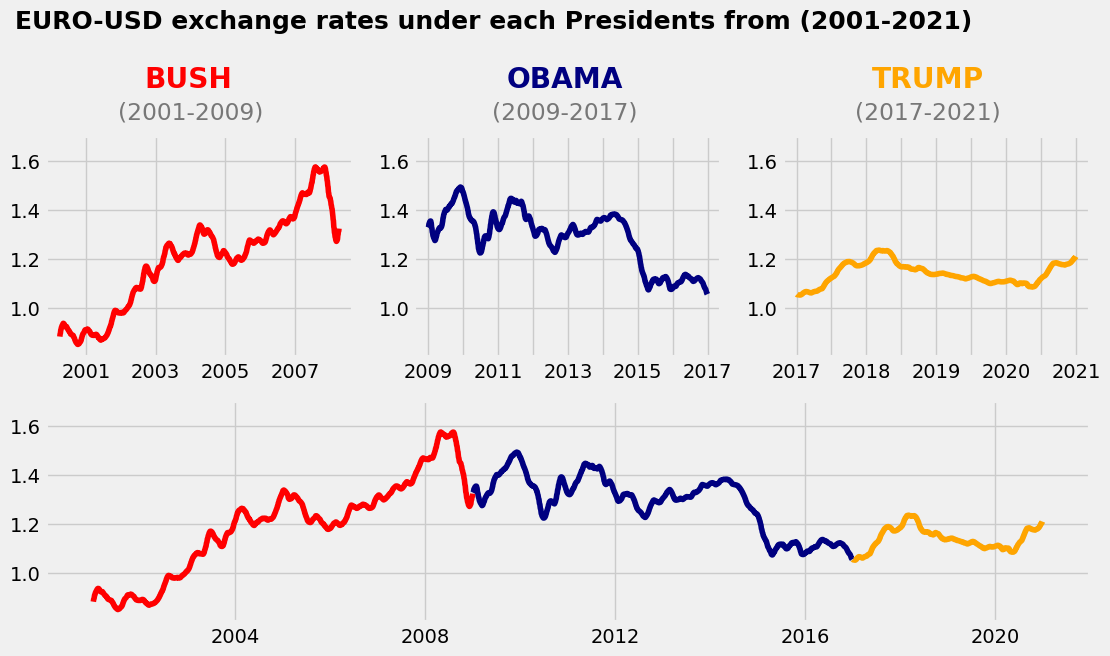

In [84]:

plt.figure(figsize = (12,6))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'])

ax1.plot(bush['Time'], bush['rolling_mean'], color = 'red')
ax1.text(pd.Timestamp('2003-06-01'), 1.9,'BUSH', weight = 'bold'
         ,size = 'x-large', color = 'red')
ax1.text(pd.Timestamp('2002-09-01'), 1.77,'(2001-2009)'
        , size = 'large', alpha = 0.5)
ax1.xaxis.set_major_locator(ydates.MonthLocator(interval=24))
ax1.xaxis.set_major_formatter(ydates.DateFormatter('%Y'))

ax2.plot(obama['Time'], obama['rolling_mean'], color = 'navy')
ax2.text(pd.Timestamp('2011-04-01'), 1.9,'OBAMA'
         , weight = 'bold'
         ,size = 'x-large', color = 'navy')
ax2.text(pd.Timestamp('2010-11-01'), 1.77, '(2009-2017)'
        , size = 'large', alpha = 0.5)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'])

ax3.plot(trump['Time'], trump['rolling_mean'], color = 'orange')
ax3.text(pd.Timestamp('2018-02-01'), 1.9,'TRUMP'
         , weight = 'bold'
         ,size = 'x-large', color = 'orange')
ax3.text(pd.Timestamp('2017-11-01'), 1.77,'(2017-2021)'
        , size = 'large', alpha = 0.5)

ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'])


ax4.plot(pres_3['Time'], pres_3['rolling_mean'], alpha = 0.1)
ax4.plot(bush['Time'], bush['rolling_mean'], color = 'red')
ax4.plot(obama['Time'], obama['rolling_mean'], color = 'navy')
ax4.plot(trump['Time'], trump['rolling_mean'], color = 'orange')

ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under each Presidents from (2001-2021)''',
        fontsize=18, weight = 'bold')

plt.show()